# Neural Models
### Lauren Blanks, Thomas Kyle, Brenton Pieper

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# import data
# df7 = pd.read_csv('nfl_df_7features.csv')
df = pd.read_pickle('nfl_df_averages.pkl')

In [3]:
# convert the date column to datetime and report the earliest and latest dates
df['date'] = pd.to_datetime(df['date'])
print(df['date'].min())
print(df['date'].max())

2002-09-05 00:00:00
2022-02-13 00:00:00


In [4]:
# create X and y
# define X to be df with all columns that have Avg in the name
X = df[[col for col in df.columns if 'Avg' in col]]
# remove home_homeAvg and home_awayAvg
X = X.drop(['home_homeAvg', 'home_awayAvg'], axis=1)
# y is the winner column
y = df['winner']

In [5]:
# do an 80/20 train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Neural Models

In [6]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# create a neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000)
mlp.fit(X_train, y_train)

# predict the test data
predictions = mlp.predict(X_test)

# print the classification report
print(classification_report(y_test, predictions))

# print the confusion matrix
print(confusion_matrix(y_test, predictions))

# print the accuracy score
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.49      0.48       448
           1       0.62      0.61      0.62       624

    accuracy                           0.56      1072
   macro avg       0.55      0.55      0.55      1072
weighted avg       0.56      0.56      0.56      1072

[[220 228]
 [245 379]]
0.558768656716418


In [8]:
# perform a grid search to find the best parameters
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
param_grid = {'hidden_layer_sizes': [(30,30,30), (50,50,50)],
                'activation': ['logistic', 'relu'],
                'solver': ['sgd', 'adam'],
                'alpha': [0.0001, 0.05],
                'learning_rate': ['adaptive']}
# instantiate the grid
grid = GridSearchCV(MLPClassifier(), param_grid, refit=True, verbose=3)

# fit the grid with data
grid.fit(X_train, y_train)

# view the results as a pandas DataFrame
results = pd.DataFrame(grid.cv_results_)
results

# print the best parameters
print(grid.best_params_)
# print the best estimator
print(grid.best_estimator_)
# print the best score
print(grid.best_score_)
# print the best index
print(grid.best_index_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.2s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.3s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.2s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.560 total time=   1.2s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.562 total time=   3.8s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.547 total time=   3.6s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.615 total time=   3.6s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.575 total time=   3.5s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.602 total time=   3.5s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.6s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.5s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.7s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.6s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.560 total time=   1.6s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.569 total time=   4.9s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.599 total time=   4.8s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.573 total time=   5.0s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.565 total time=   4.8s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.587 total time=   7.6s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.2s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.2s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.2s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.2s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.560 total time=   1.1s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.623 total time=   3.4s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.635 total time=   1.7s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.629 total time=   3.6s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.625 total time=   3.6s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.616 total time=   3.7s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.6s
[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.6s
[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.6s
[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.559 total time=   1.6s
[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.560 total time=   1.6s
[CV 1/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, 

/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.618 total time=   4.8s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.607 total time=   4.8s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.630 total time=   4.8s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.628 total time=   4.8s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.620 total time=   3.1s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.609 total time=   3.2s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.620 total time=   3.1s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.618 total time=   3.2s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.643 total time=   3.1s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.561 total time=   3.4s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.552 total time=   3.3s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.557 total time=   3.0s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.559 total time=   3.5s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.565 total time=   2.8s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.614 total time=   4.4s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.634 total time=   4.6s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.621 total time=   4.3s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.624 total time=   7.2s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.621 total time=   4.4s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.547 total time=   3.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.560 total time=   3.8s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.562 total time=   3.7s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.567 total time=   3.3s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.580 total time=   3.5s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.627 total time=   3.2s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.621 total time=   3.1s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.616 total time=   3.1s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.613 total time=   3.1s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=sgd;, score=0.638 total time=   3.2s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.538 total time=   3.0s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.564 total time=   3.4s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.573 total time=   3.3s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.573 total time=   3.4s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(30, 30, 30), learning_rate=adaptive, solver=adam;, score=0.554 total time=   3.5s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.609 total time=   4.2s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.625 total time=   4.2s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.637 total time=   4.3s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.621 total time=   4.3s


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd;, score=0.620 total time=   4.3s
[CV 1/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.548 total time=   4.1s
[CV 2/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.588 total time=   2.5s
[CV 3/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.567 total time=   3.7s
[CV 4/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.545 total time=   3.8s
[CV 5/5] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam;, score=0.573 total time=   4.4s
{'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (30, 30, 30), 'learning_rate': 'adaptive', 'solver': 'adam'}
MLPClassifie

/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# use grid.best_params_ to create a new model
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='logistic', solver='adam', alpha=0.05, learning_rate='adaptive', max_iter=1000000)

# fit the model
mlp.fit(X_train, y_train)

# predict the test data
predictions = mlp.predict(X_test)


# print accuracy score
print(accuracy_score(y_test, predictions))

0.5867537313432836


In [13]:
# use an ensemble method to improve the model
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# create a dictionary of our models
estimators=[('mlp', mlp), ('logistic', LogisticRegression()), ('svc', SVC()), ('tree', DecisionTreeClassifier())]

# create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

# fit model to training data
ensemble.fit(X_train, y_train)

# predict the test data
predictions = ensemble.predict(X_test)

# print accuracy score
print(accuracy_score(y_test, predictions))


/Users/thomaskyle/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6315298507462687


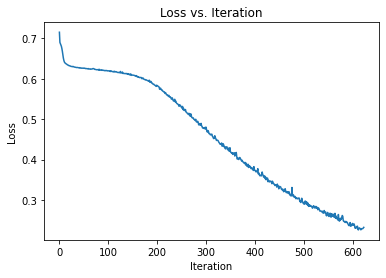

In [14]:
# plot loss vs. iteration
plt.plot(mlp.loss_curve_)
plt.title('Loss vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()
